<h3> <b> Book Sales : Data Analysis </b> </h3>

**"What are the key ingredients for a successful book in today's market?"**

Critical Success: High ratings from readers.

Commercial Success: High sales and revenue.


<h4> <b> Chapter 1 : Bird's Eye View of the Book World  </b> </h4>

<i>Before we can find the ingredients for success, we first need to understand the world we're operating in. What does the modern book market look like? What genres dominate the shelves, and when were most of these books written? </i>


- Use your "Distribution of Publishing Year" histogram to show that the market is heavily skewed towards modern books.

- Use your "Distribution of Books by Genre" bar chart to show which genres are the most crowded.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/Books_Data_Clean.csv")

In [2]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
df.head()

First few rows of the DataFrame:


,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [3]:
# Display the summary statistics of the DataFrame
print("Summary statistics of the DataFrame:")
df.describe()

Summary statistics of the DataFrame:


,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [4]:
# We observe that the minimum of the publishing year is negative, which is not possible.
# This indicates that there are some errors in the data. So we will only keep rows after 1900

df = df[df["Publishing Year"] > 1900]
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,535.926660,1994.730426,4.012230,94817.793855,1832.644985,841.360638,4.844311,613.314172,9744.482656
std,308.769358,23.204719,0.246492,31473.890412,3947.885096,2279.579848,3.561712,369.628663,15350.021050
min,0.000000,1901.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,271.000000,1989.000000,3.860000,70701.000000,366.300000,0.000000,1.990000,291.000000,570.000000
50%,535.000000,2003.000000,4.030000,89204.000000,792.000000,273.240000,3.990000,596.000000,3942.000000
75%,802.000000,2010.000000,4.180000,113400.000000,1470.260000,714.756000,6.990000,933.000000,5427.000000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [5]:
df.nunique()

index                  1009
Publishing Year         101
Book Name               987
Author                  680
language_code             8
Author_Rating             4
Book_average_rating     134
Book_ratings_count     1004
genre                     4
gross sales             790
publisher revenue       583
sale price              146
sales rank              834
Publisher                 9
units sold              476
dtype: int64

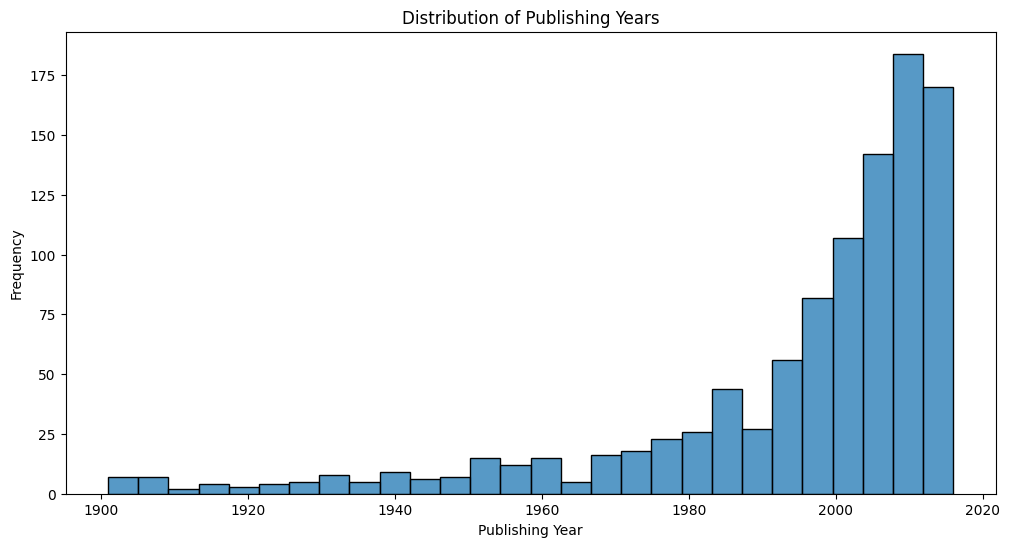

In [6]:
# Visualize the distribution of the publishing years

plt.figure(figsize=(12, 6))
sns.histplot(df["Publishing Year"])
plt.xlabel("Publishing Year")
plt.ylabel("Frequency")
plt.title("Distribution of Publishing Years")
plt.show()

**The data is heavily skewed towards mordern books,** to observe this more carefully what percentage of books were published after 2020 from the total books that are published and it will give us a clear picture.


In [7]:
# Check the data type of the "Publishing Year" column

print(df["Publishing Year"].dtype)

books_after_1990 = 0
for year in df["Publishing Year"]:
    if year > 1990:
        books_after_1990 += 1

print(f"Total number of books published after 1990: {books_after_1990}")

total_books = df.shape[0]
print(f"Total number of books: {total_books}")

percentage_after_1990 = (books_after_1990 / total_books) * 100
print(f"Percentage of books published after 1990: {percentage_after_1990:.2f}%")

float64
Total number of books published after 1990: 748
Total number of books: 1009
Percentage of books published after 1990: 74.13%


- Approximately 75 percent of all books sold were published after 1990


Percentage of books in each genre:
genre
genre fiction    76.808722
nonfiction       16.055500
fiction           5.649158
children          1.486620
Name: proportion, dtype: float64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'genre fiction'),
  Text(1, 0, 'nonfiction'),
  Text(2, 0, 'fiction'),
  Text(3, 0, 'children')])

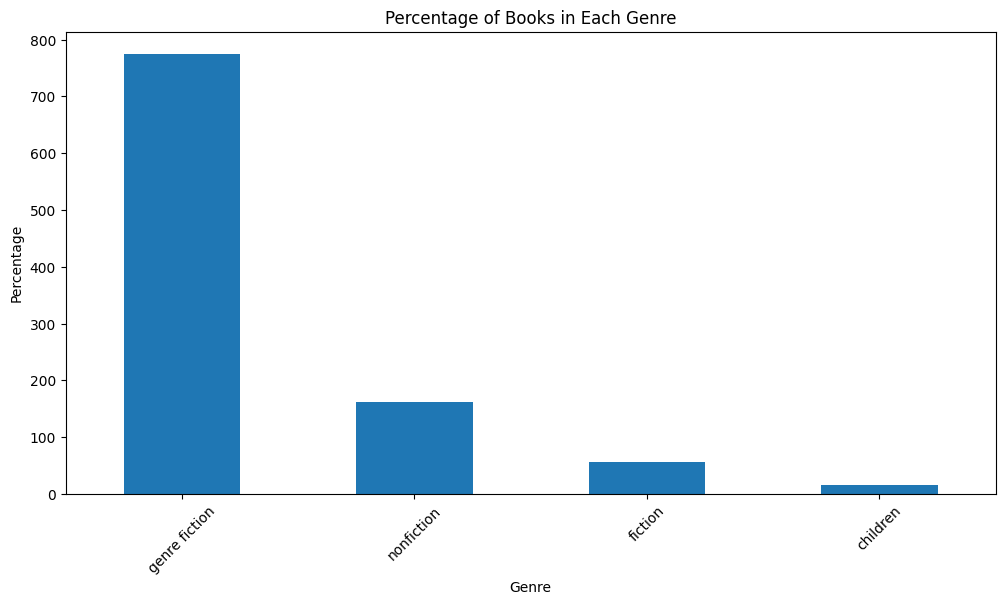

In [8]:
# Visualise the distribution of Books with Genre

print("Percentage of books in each genre:")
genre_counts = df["genre"].value_counts(normalize=True) * 100
print(genre_counts)
df["genre"].value_counts().plot(kind="bar", figsize=(12, 6))
plt.xlabel("Genre")
plt.ylabel("Percentage")
plt.title("Percentage of Books in Each Genre")
plt.xticks(rotation=45)

- **Fiction:** This is a very broad category for any work that is not based on real events (i.e., it's "made up").

- **Genre Fiction:** This is a subcategory of fiction. It refers to books written to fit the conventions of a specific genre like science fiction, fantasy, romance, mystery, or thriller. These books prioritize plot and adhere to established formulas and reader expectations.

---


---

<h4> <b> Chapter 2: The Reader's Choice - What Makes a "Good" Book? </b> </h4>

<i> Now let's look at success through the eyes of the reader. What do they consider to be a high-quality book? Do some genres consistently produce more beloved books than others? </i>


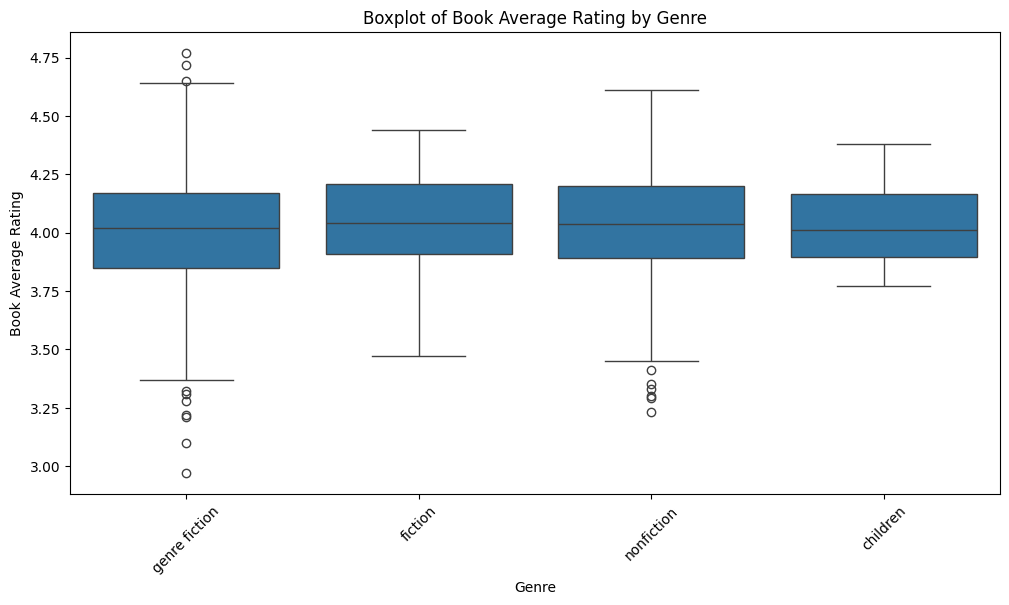

In [9]:
# Boxplot of Book Average Rating by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x="genre", y="Book_average_rating", data=df)
plt.xlabel("Genre")
plt.ylabel("Book Average Rating")
plt.title("Boxplot of Book Average Rating by Genre")
plt.xticks(rotation=45)
plt.show()

- All genres have a median rating around 4.0, indicating similar central tendencies.

- The boxes (IQRs) are fairly similar across genres, meaning the spread of the middle 50% of ratings is consistent. **Genre fiction and nonfiction might have slightly wider IQRs than fiction and children.**

- All genres have outliers, especially genre fiction and nonfiction, which **show quite a few low-rating outliers (below 3.5). This suggests more variability and potential polarizing books in these genres.**

- Children's books appear to have fewer extreme outliers, which could **suggest a more consistent rating distribution.**


In [10]:
# Highest rated authors overall
top_authors = df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending=False).head(10)
print("Top 10 Authors by Average Book Rating:")
print(top_authors)

Top 10 Authors by Average Book Rating:
Author
Bill Watterson                    4.650
Bill Watterson, G.B. Trudeau      4.610
J.R.R. Tolkien                    4.590
George R.R. Martin                4.560
Sarah J. Maas                     4.526
Kate Egan                         4.510
Hiromu Arakawa, Akira Watanabe    4.490
Cassandra Clare                   4.480
Art Spiegelman                    4.470
Larry McMurtry                    4.470
Name: Book_average_rating, dtype: float64


In [11]:
# Highest rated authors by genre

# 1.  genre fiction
genre_fiction_authors = df[df["genre"] == "genre fiction"].groupby("Author")["Book_average_rating"].mean().sort_values(ascending=False).head(5)
print("\nTop 5 Genre Fiction Authors by Average Book Rating:")
print(genre_fiction_authors)

# 2.  nonfiction
nonfiction_authors = df[df["genre"] == "nonfiction"].groupby("Author")["Book_average_rating"].mean().sort_values(ascending=False).head()
print("\nTop 5 Nonfiction Authors by Average Book Rating:")
print(nonfiction_authors)

# 3.  fiction
fiction_authors = df[df["genre"] == "fiction"].groupby("Author")["Book_average_rating"].mean().sort_values(ascending=False).head(5)
print("\nTop 5 Fiction Authors by Average Book Rating:")
print(fiction_authors)

# 4.  children
children_authors = df[df["genre"] == "children"].groupby("Author")["Book_average_rating"].mean().sort_values(ascending=False).head(5)
print("\nTop 5 Children Authors by Average Book Rating:")
print(children_authors)



Top 5 Genre Fiction Authors by Average Book Rating:
Author
Bill Watterson        4.650
J.R.R. Tolkien        4.590
Sarah J. Maas         4.585
George R.R. Martin    4.560
Kate Egan             4.510
Name: Book_average_rating, dtype: float64

Top 5 Nonfiction Authors by Average Book Rating:
Author
Bill Watterson, G.B. Trudeau        4.610
Marissa Meyer                       4.475
Art Spiegelman                      4.470
Brandon Sanderson                   4.460
Arthur Conan Doyle, Kyle Freeman    4.460
Name: Book_average_rating, dtype: float64

Top 5 Fiction Authors by Average Book Rating:
Author
Colleen Hoover                      4.44
Robert Jordan, Brandon Sanderson    4.42
Jim Butcher                         4.41
Isaac Asimov                        4.39
Terry Pratchett                     4.36
Name: Book_average_rating, dtype: float64

Top 5 Children Authors by Average Book Rating:
Author
J.R. Ward          4.38
Jim Butcher        4.32
Neal Stephenson    4.25
Janet Evanovich    4.

**Bill Waterson** seems to be consistently the best rated author in the Fiction and Non-Fiction genres perhaps if an aspiring author is struggling to find inspiration his books can be a good prototype to take into account in regards to what makes a good read.

Ofcourse a honorable mention goes out to all the other writers that excel in their fields such as **Fiction and Children Authors like Colleen Hoover and J.R. Ward.**

---


---

<h4> <b> Chapter 3: The Bottom Line - What Actually Sells? </b> </h4>

<i> While critical acclaim is wonderful, publishers need to stay in business. So, what drives commercial success? Is a 5-star rating a golden ticket to high sales, or is the reality more complicated? </i>


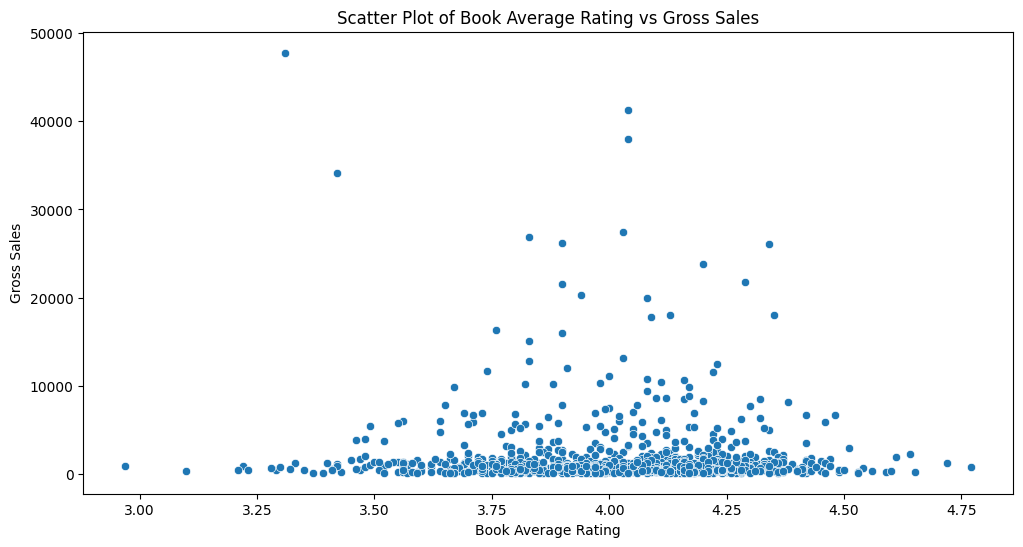

In [12]:
# Scatter plot to explore the relationship between Book_average_rating and gross sales

plt.figure(figsize=(12, 6))
sns.scatterplot(x="Book_average_rating", y="gross sales", data=df)
plt.xlabel("Book Average Rating")
plt.ylabel("Gross Sales")
plt.title("Scatter Plot of Book Average Rating vs Gross Sales")
plt.show()

- There's no strong upward or downward trend.

- High-selling books are scattered across a wide range of average ratings — some bestsellers have ratings as low as 3.2 or 3.4.

- Many books with high ratings (above 4.3) have low to moderate sales.

**→ Conclusion: A higher rating does not necessarily result in higher sales.**


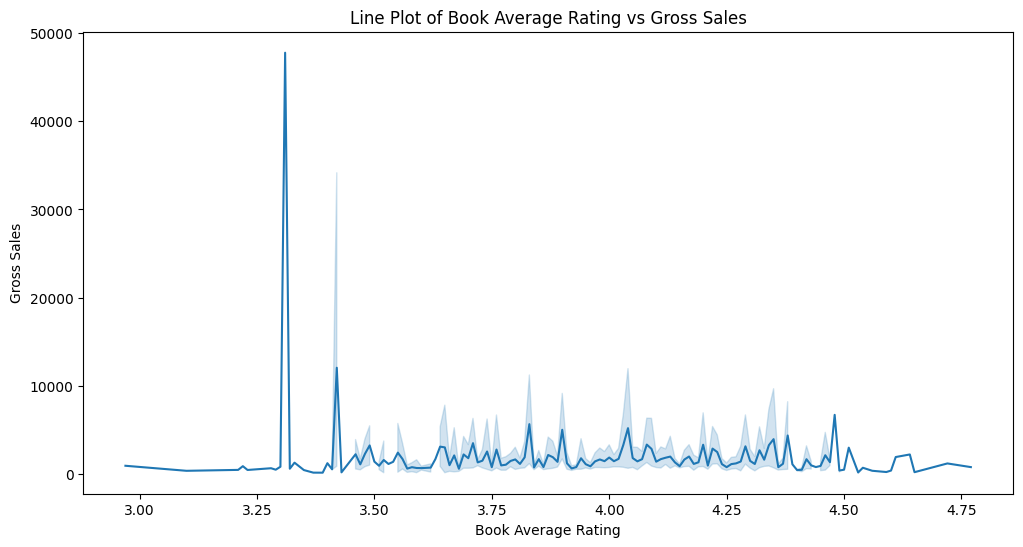

In [13]:
# Line plot to visualize the trend of gross sales with rating

plt.figure(figsize=(12, 6))
sns.lineplot(x="Book_average_rating", y="gross sales", data=df)
plt.xlabel("Book Average Rating")
plt.ylabel("Gross Sales")
plt.title("Line Plot of Book Average Rating vs Gross Sales")
plt.show()

- There's high variance (spiky pattern), suggesting a few extreme sales outliers.

- The line doesn’t show a clear increase with rating — in fact, one of the highest grossing books is around rating 3.3.

- Ratings between 3.8–4.3 seem to have slightly more consistent sales, but the peak outliers still appear outside that range.


([0, 1, 2, 3],
 [Text(0, 0, 'genre fiction'),
  Text(1, 0, 'fiction'),
  Text(2, 0, 'nonfiction'),
  Text(3, 0, 'children')])

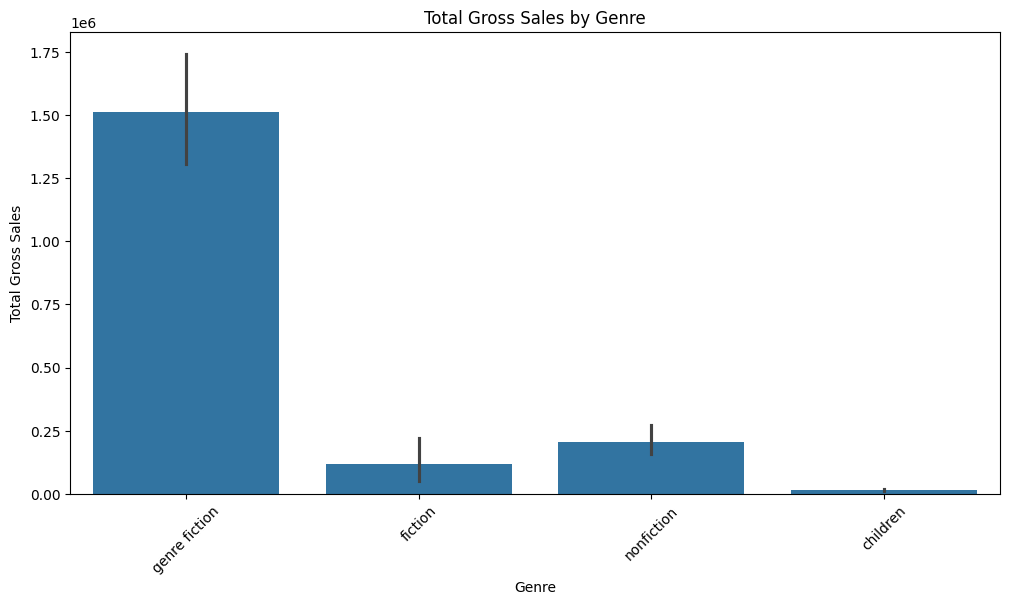

In [14]:
# Bar chart showing the total gross sales by genre

plt.figure(figsize=(12, 6))
sns.barplot(x="genre", y="gross sales", data=df, estimator=np.sum)
plt.xlabel("Genre")
plt.ylabel("Total Gross Sales")
plt.title("Total Gross Sales by Genre")
plt.xticks(rotation=45)

- This graph shows "genre fiction" as the most commercially successful book but we have to keep in mind that genre fiction also has the most books published and sold, so writing a "genre fiction" book might mean you have the most chances of success but it also means you have a lot more competition.

For a better understanding lets calculate the average value of a book in every genre.


In [16]:
# Average value of a book in every genre
average_value_by_genre = df.groupby("genre")["gross sales"].mean().sort_values(ascending=False)
print("\nAverage Value of a Book in Each Genre:")
print(average_value_by_genre)


Average Value of a Book in Each Genre:
genre
fiction          2069.064035
genre fiction    1949.070284
nonfiction       1276.360802
children          926.814667
Name: gross sales, dtype: float64


As you can see now that the graph above was a bit decieving the average value of a book sold by genres is not actually highest for "genre fiction" even though overall value of the gross sales for genre fiction is the largest, **"fiction" even though it sells a lot less books the chances of your book being highly valued in fiction would be more as the competition is less and perhaps also means more demand and value for your book.**

---

---


<h4> <b> Chapter 4: The Sweet Spot - Where Quality Meets Commerce </b> </h4>

<i> We've seen what readers love and what the market buys. The ultimate goal is to find the sweet spot: books that are both critically and commercially successful. Where do these two measures of success overlap? </i>


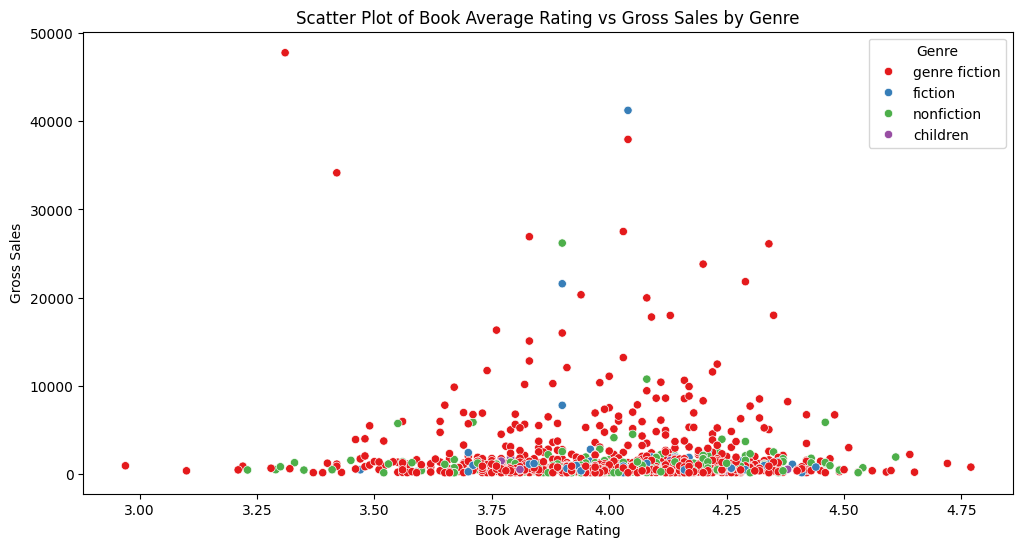

In [17]:
# Scatter plot from Chapter 3 but color the dots by Genre
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Book_average_rating", y="gross sales", hue="genre", data=df, palette="Set1")
plt.xlabel("Book Average Rating")
plt.ylabel("Gross Sales")
plt.title("Scatter Plot of Book Average Rating vs Gross Sales by Genre")
plt.legend(title="Genre")
plt.show()

<i> So, after our data-driven journey, what are the key ingredients for a successful book? Our analysis points to three things: </i>

1. "Genre Fiction" is likely being used here to signify that this work belongs to a very specific, recognizable category with its own unique format (sequential art, panels, speech bubbles) and storytelling conventions. Other examples that might fall into this bucket could be science fiction, fantasy, or mystery novels.

2. With that said, "Genre Fiction" is by far the most in-demand genre outselling other genres by a large margin, so if you want the most probability of success perhaps you should look into integrating genre fiction elements in your book like making it be set in different world from ours with power and choas struggles but which also tell a story in that new world, done beautifully in the Lord of the Rings books by J.R.R. Tolkien or perhaps you can add only a few elements of ficiton but make the story somehow more relatable through it touching upon the different age groups and their problems, which Bill Waterson did in his famous comic strips of Calvin and Hobbes which captured a child interacting with his pet tiger as if it was a real friend not only showing his innocence but also the need for good companion ship in children with the fun it all brings.

3. Even though "Genre Fiction" has sold the most books "Fiction" seems to have the highest average sale price for a book, this means that the books of fiction are highly valued and sought after a great example of a succeeding fiction author would be Colleen Hoover, who is a bestselling author known for her contemporary romance novels that often explore complex relationships and emotional depth. So perhaps if as a writer you want a change of pace and touch on something emotional that the viewers can not only readd to but perhaps also connect with on a very personal and emotional level


<h4> IN SUMMARY : Our analysis tells us that book rating has almost no correlation with book ratings and sales of a books as even a 3.3 rated book can be the highest sold. Genre Fiction has the most gross sales out of any genre and consists of books which fall into a specific genre within fiction such as science, fantasy etc. while they have the most sales the Fiction genre which includes more general storytelling books such as Colleen Hoover's books have been valued more in recent years perhaps due to the connection readers are able to build with the books. 
<br>
<br>
As a new author perhaps it is better to look into Fiction genre to standout and make use of this new opportunity or stick to your roots with the tried and tested commercial successes in the Genre Fiction category such as Lord of the Rings and others. </h4>
